# <center>Task1: Breast Cancer Diagnosis Prediction</center>

In [1]:
%matplotlib inline 

import copy

import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [4]:
raw_df = pd.read_csv('dataset/data.csv')

In [5]:
df = copy.deepcopy(raw_df)

In [6]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
df.shape

(569, 33)

<AxesSubplot: >

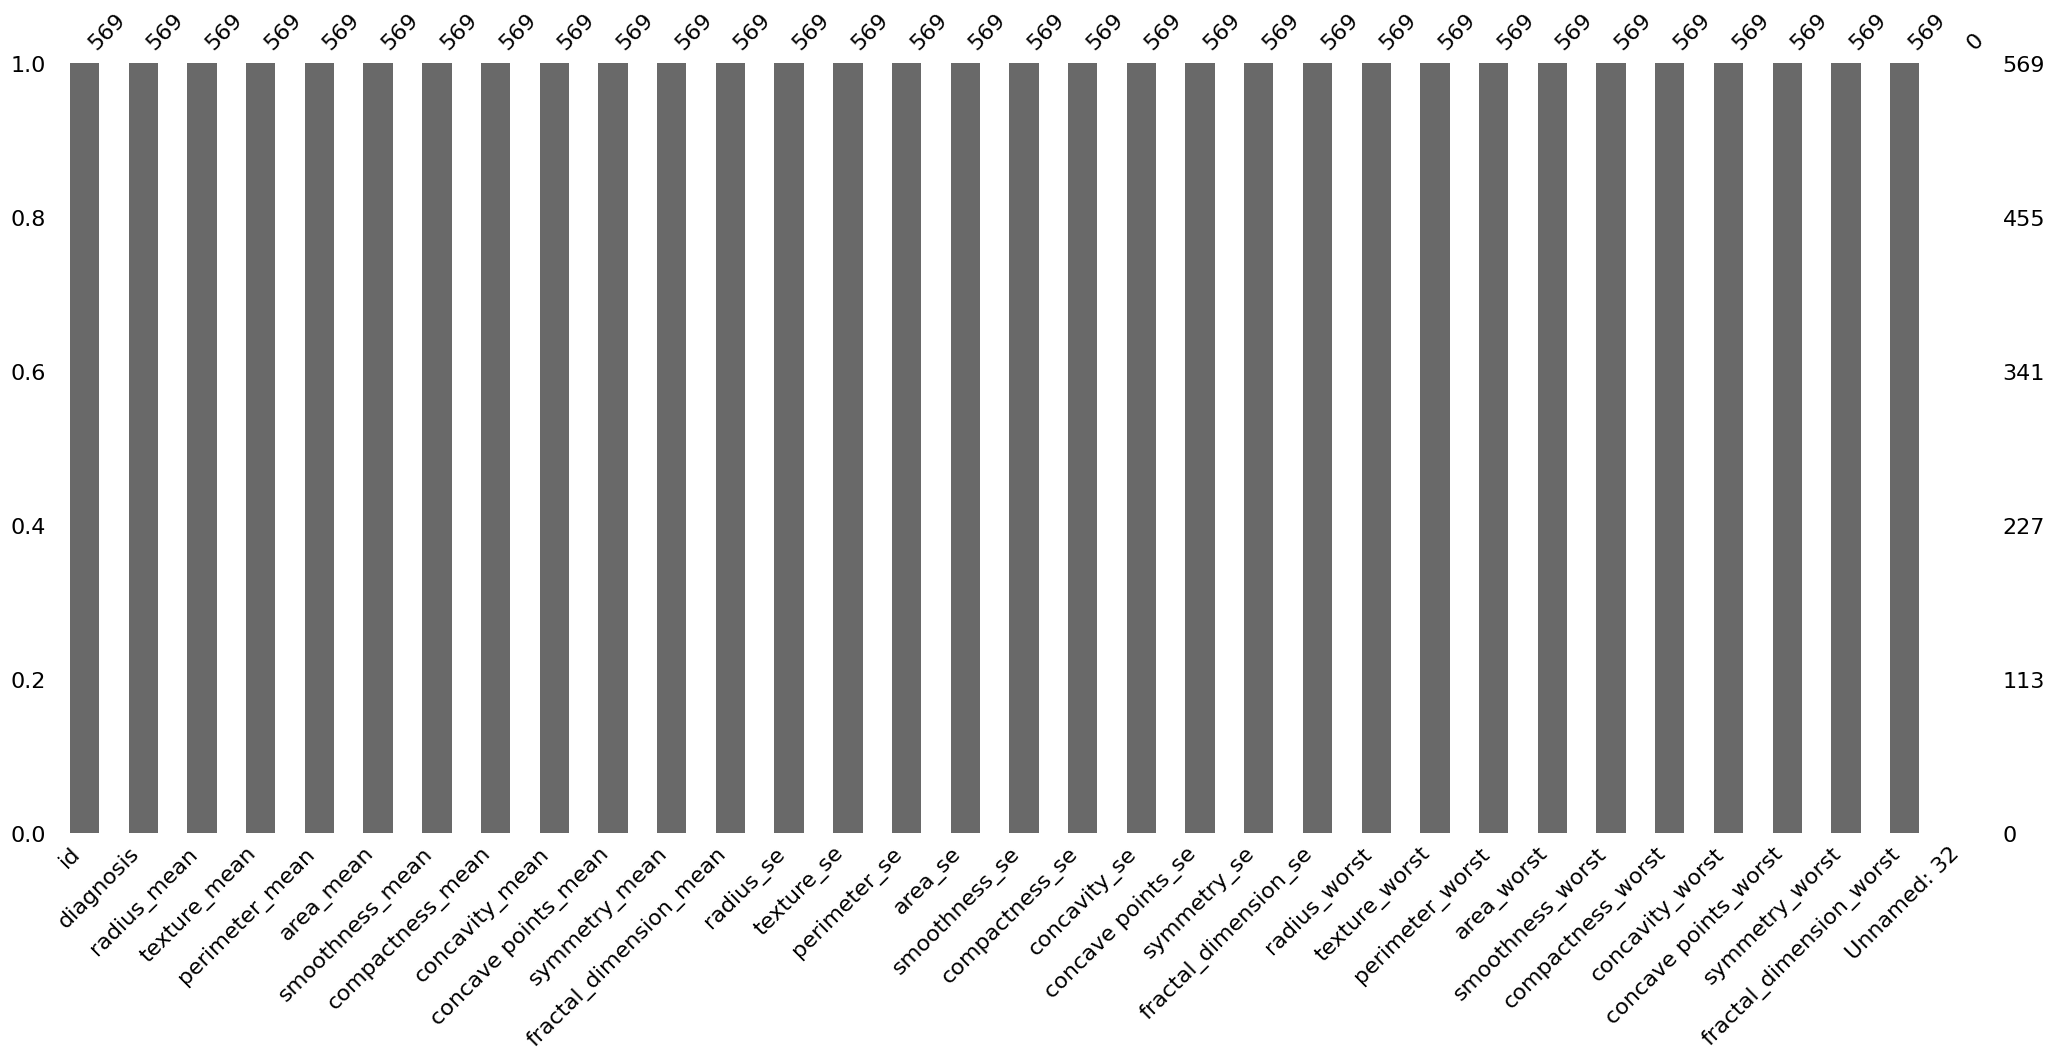

In [8]:
# Checking the missing values in the dataset.

msno.bar(df)

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- We can see that there is one column 'Unnamed: 32 ' that has all missing values. This might be because of some data uploading problem or a human error. We are dropping this column. </br>
- We are also dropping the 'id' column as this is just an id number that is of no use in the current analysis.

In [10]:
# Dropping two columns

del df['Unnamed: 32']
del df['id']

print(df.shape)

(569, 31)


In [11]:
# Checking the unique values in the target variable.

set(df.diagnosis)

{'B', 'M'}

As we can see, there are only two classes, this is a binary classification problem.

# Exploration of the Dataset.

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

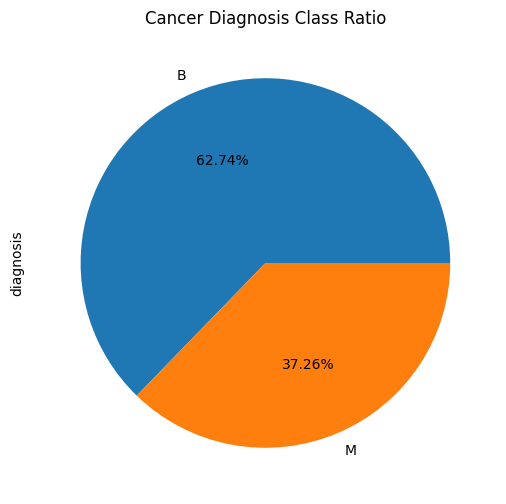

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
a4_dims = (9, 6)
per_data = df.groupby("diagnosis")["diagnosis"].count()
per_data.plot.pie(autopct="%.2f%%", figsize=a4_dims)
plt.title('Cancer Diagnosis Class Ratio')
plt.show()

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

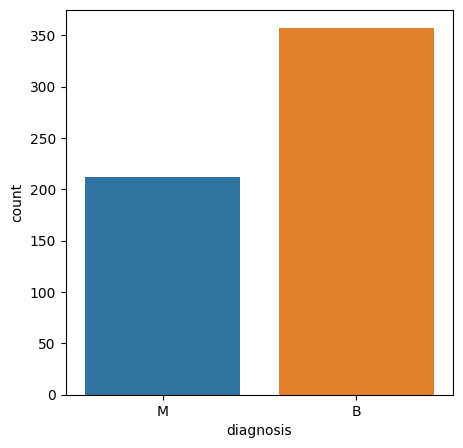

In [15]:
plt.figure(figsize = (5,5))
sns.countplot(x="diagnosis", data=df)

- As we can see, there are around 37% of the samples belonging to <b>malignant</b> whereas approximately 63% of the data samples belongs to <b>benign</b> class.
- The plot also shows us that we have balanced dataset and there is no need of any sampling techniques.

### Mean features Analysis

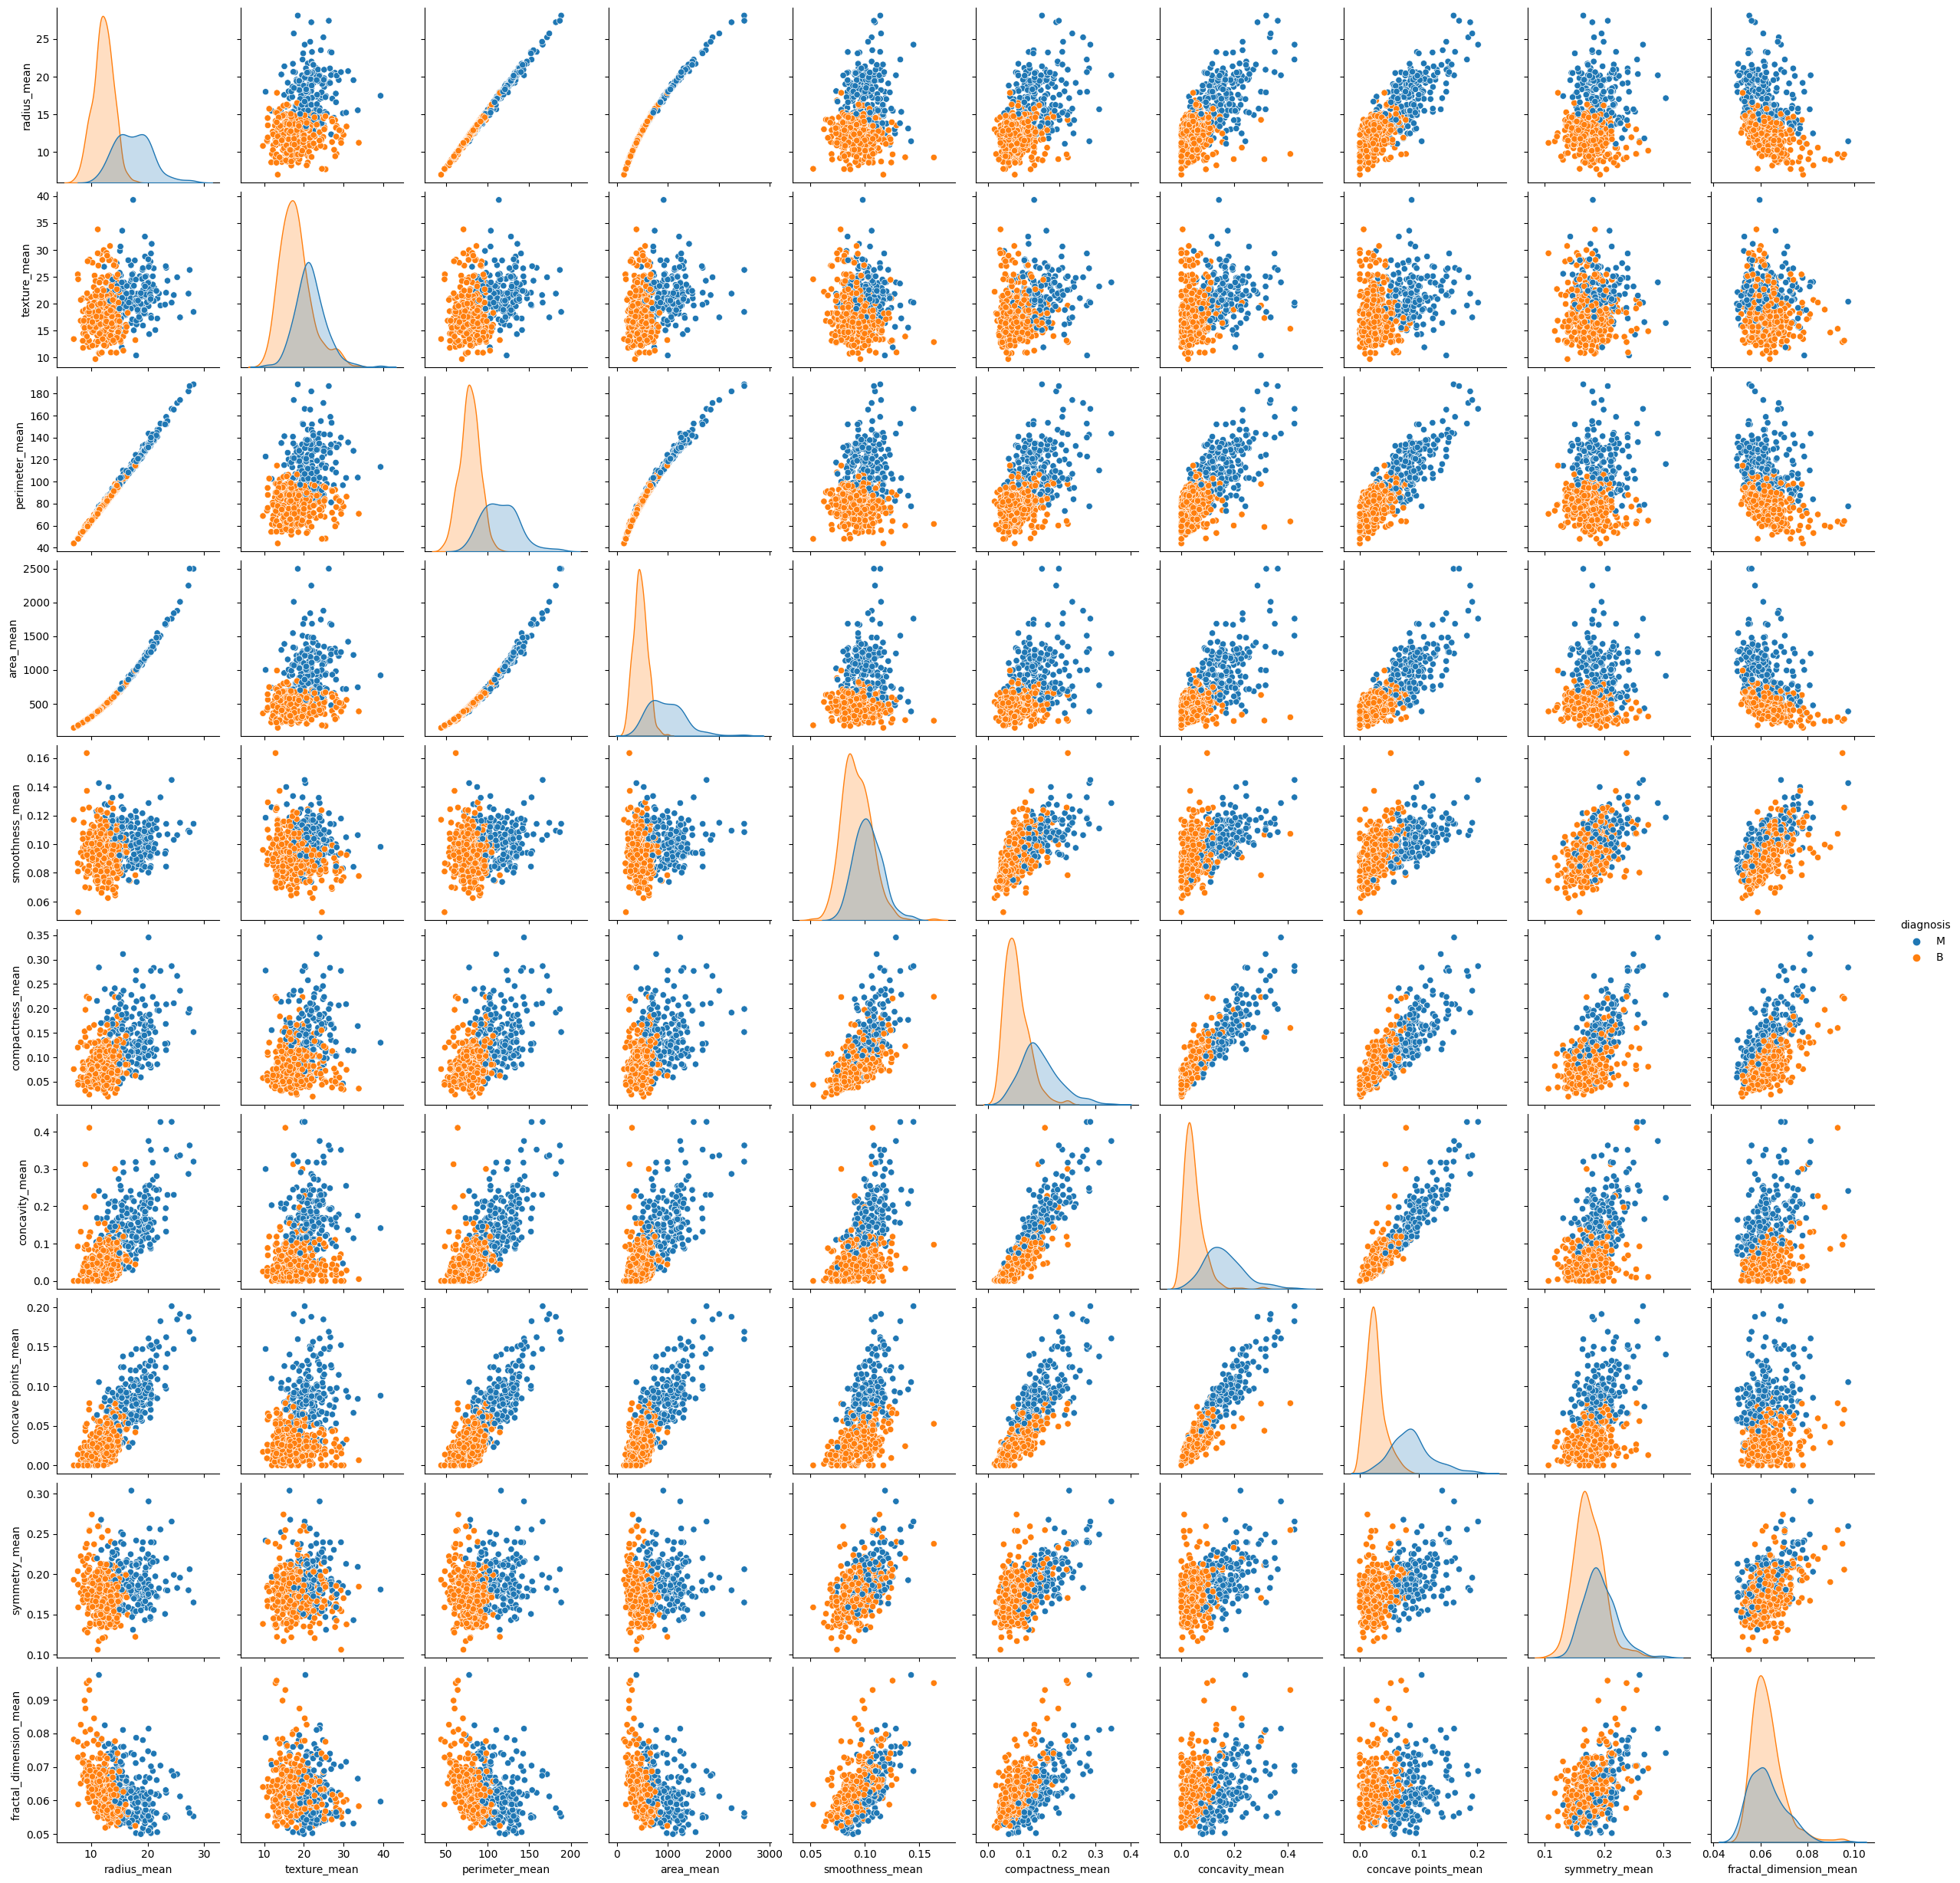

In [16]:
mean_features = [i for i in list(raw_df.columns) if '_mean' in i]
mean_features.append('diagnosis')
mean_df = raw_df[mean_features]
sns.pairplot(mean_df, hue = 'diagnosis')
# sns.pairplot(df,hue = 'diagnosis', palette='Oranges')

### SE Features Analysis

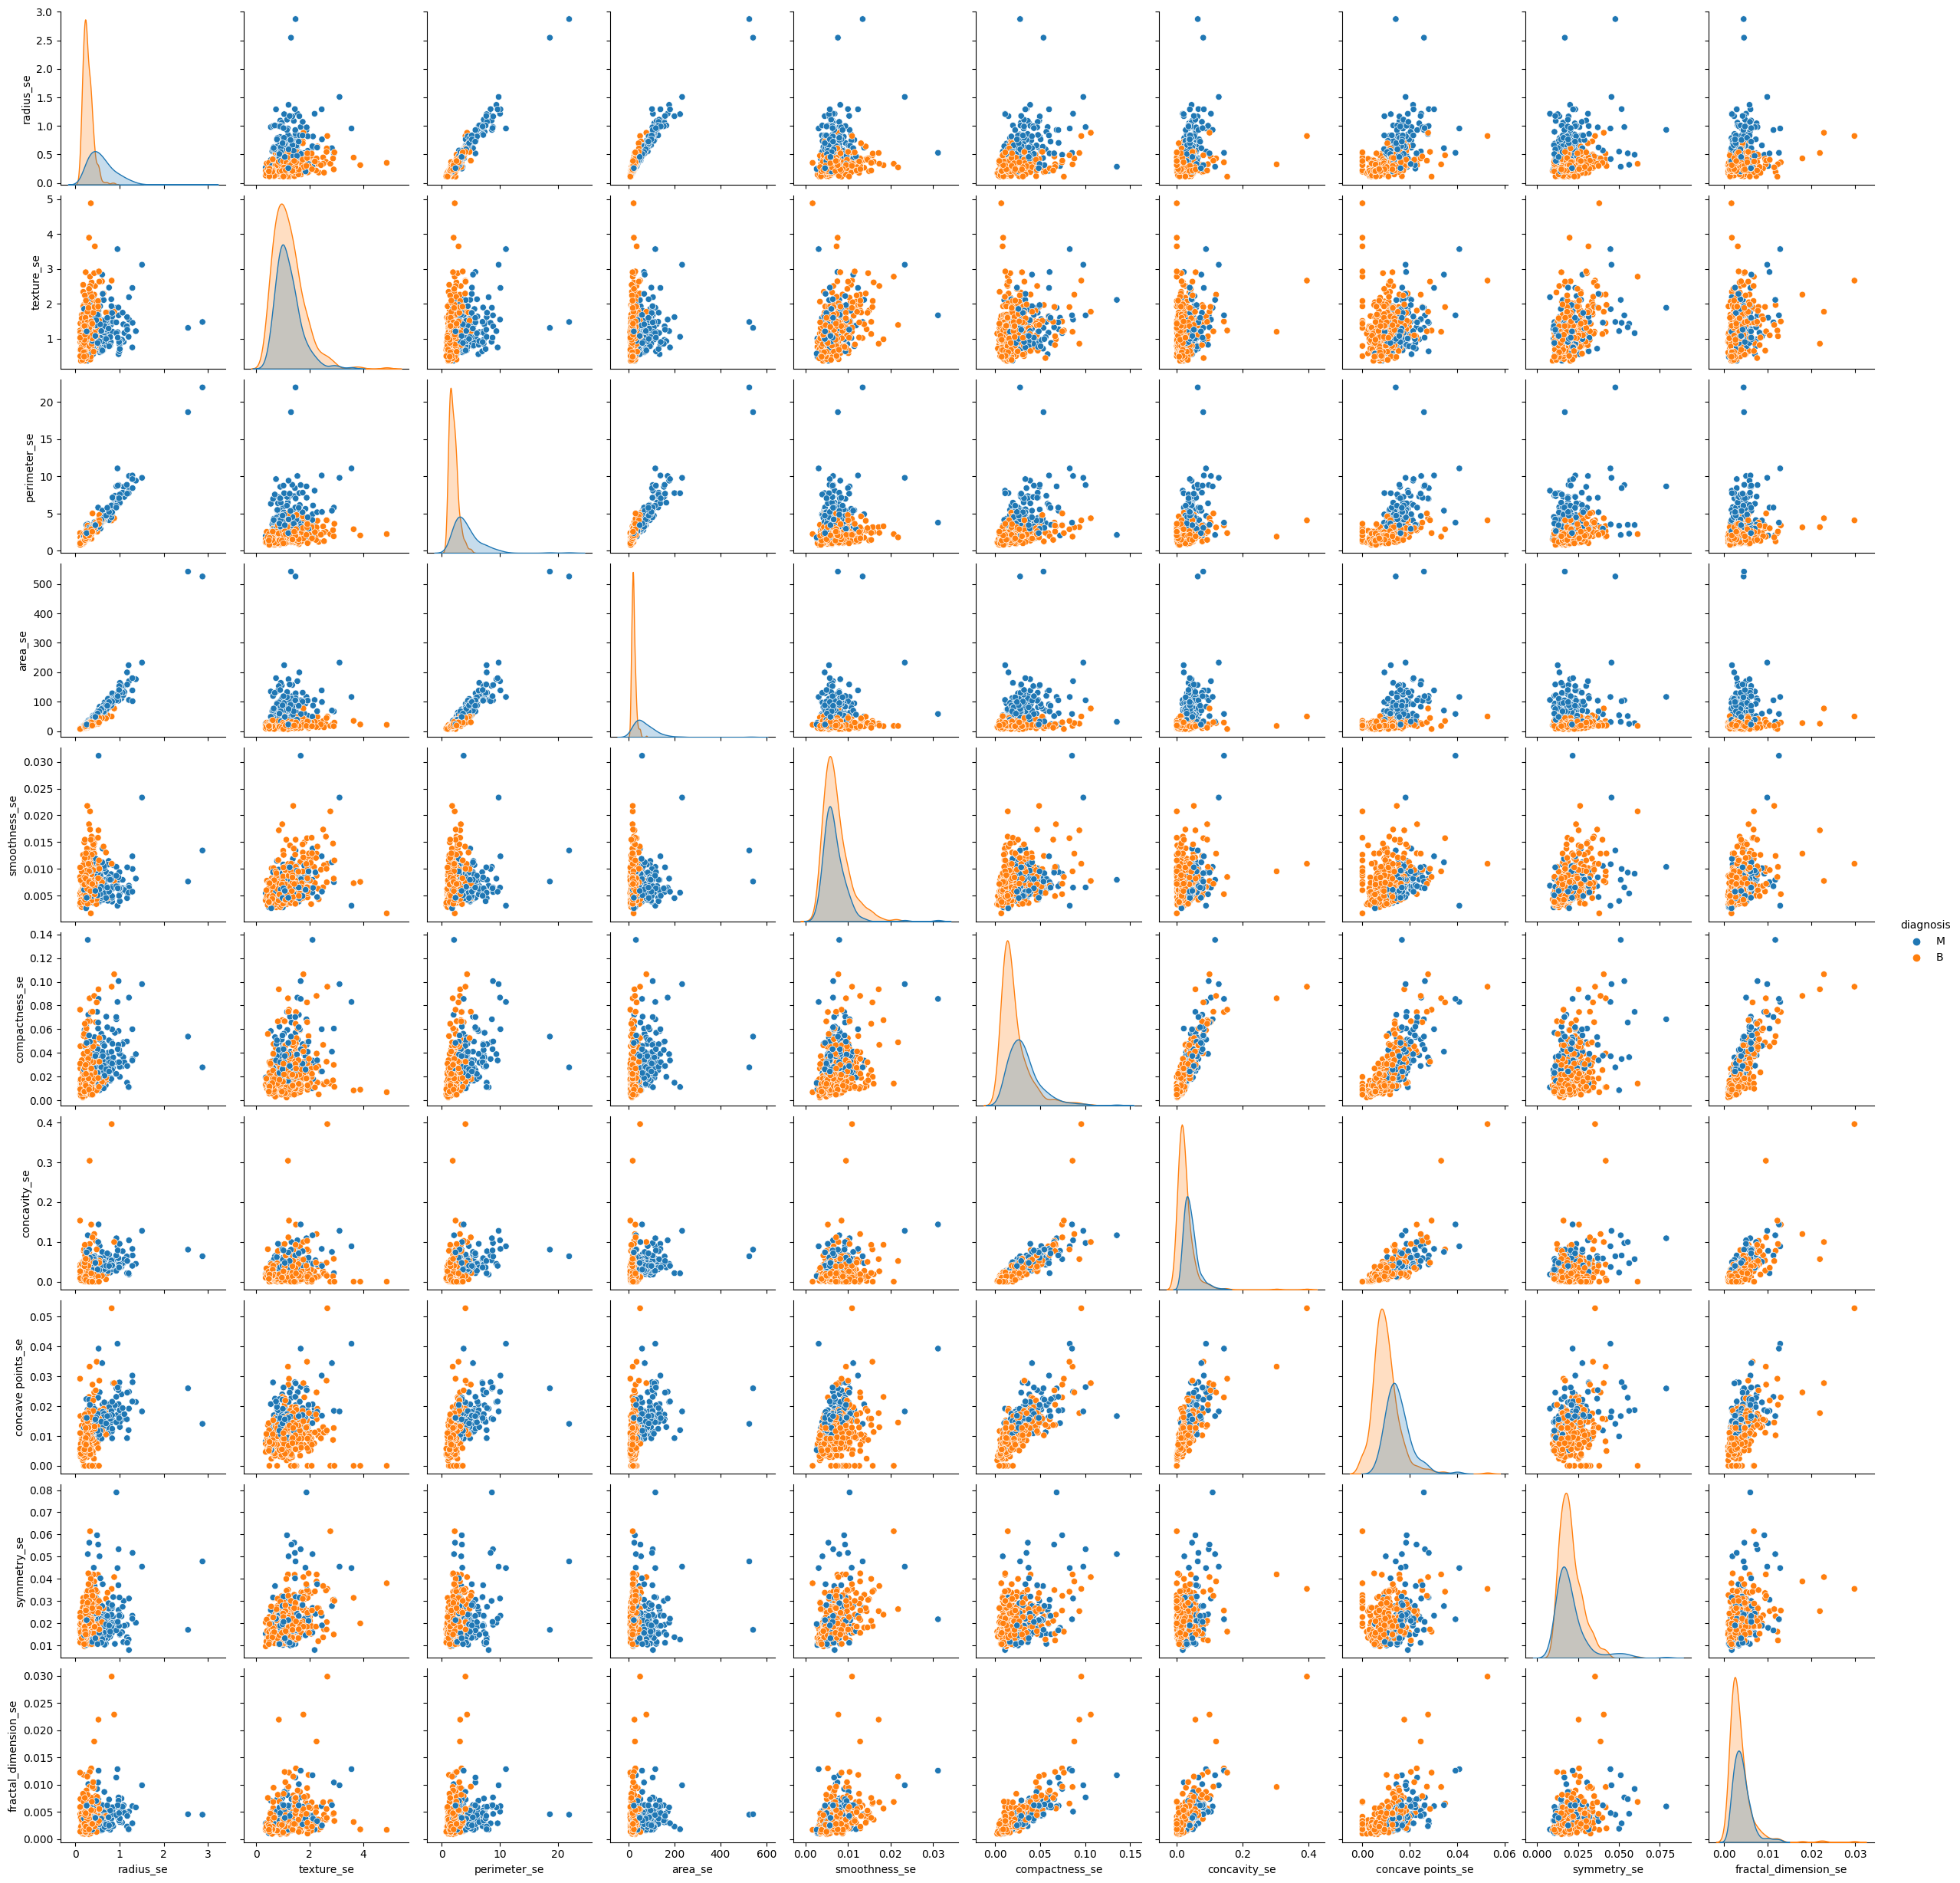

In [17]:
se_features = [i for i in list(raw_df.columns) if '_se' in i]
se_features.append('diagnosis')
se_df = raw_df[se_features]
sns.pairplot(se_df, hue = 'diagnosis')
# sns.pairplot(df,hue = 'diagnosis', palette='Oranges')

### Worst Feature Analysis.

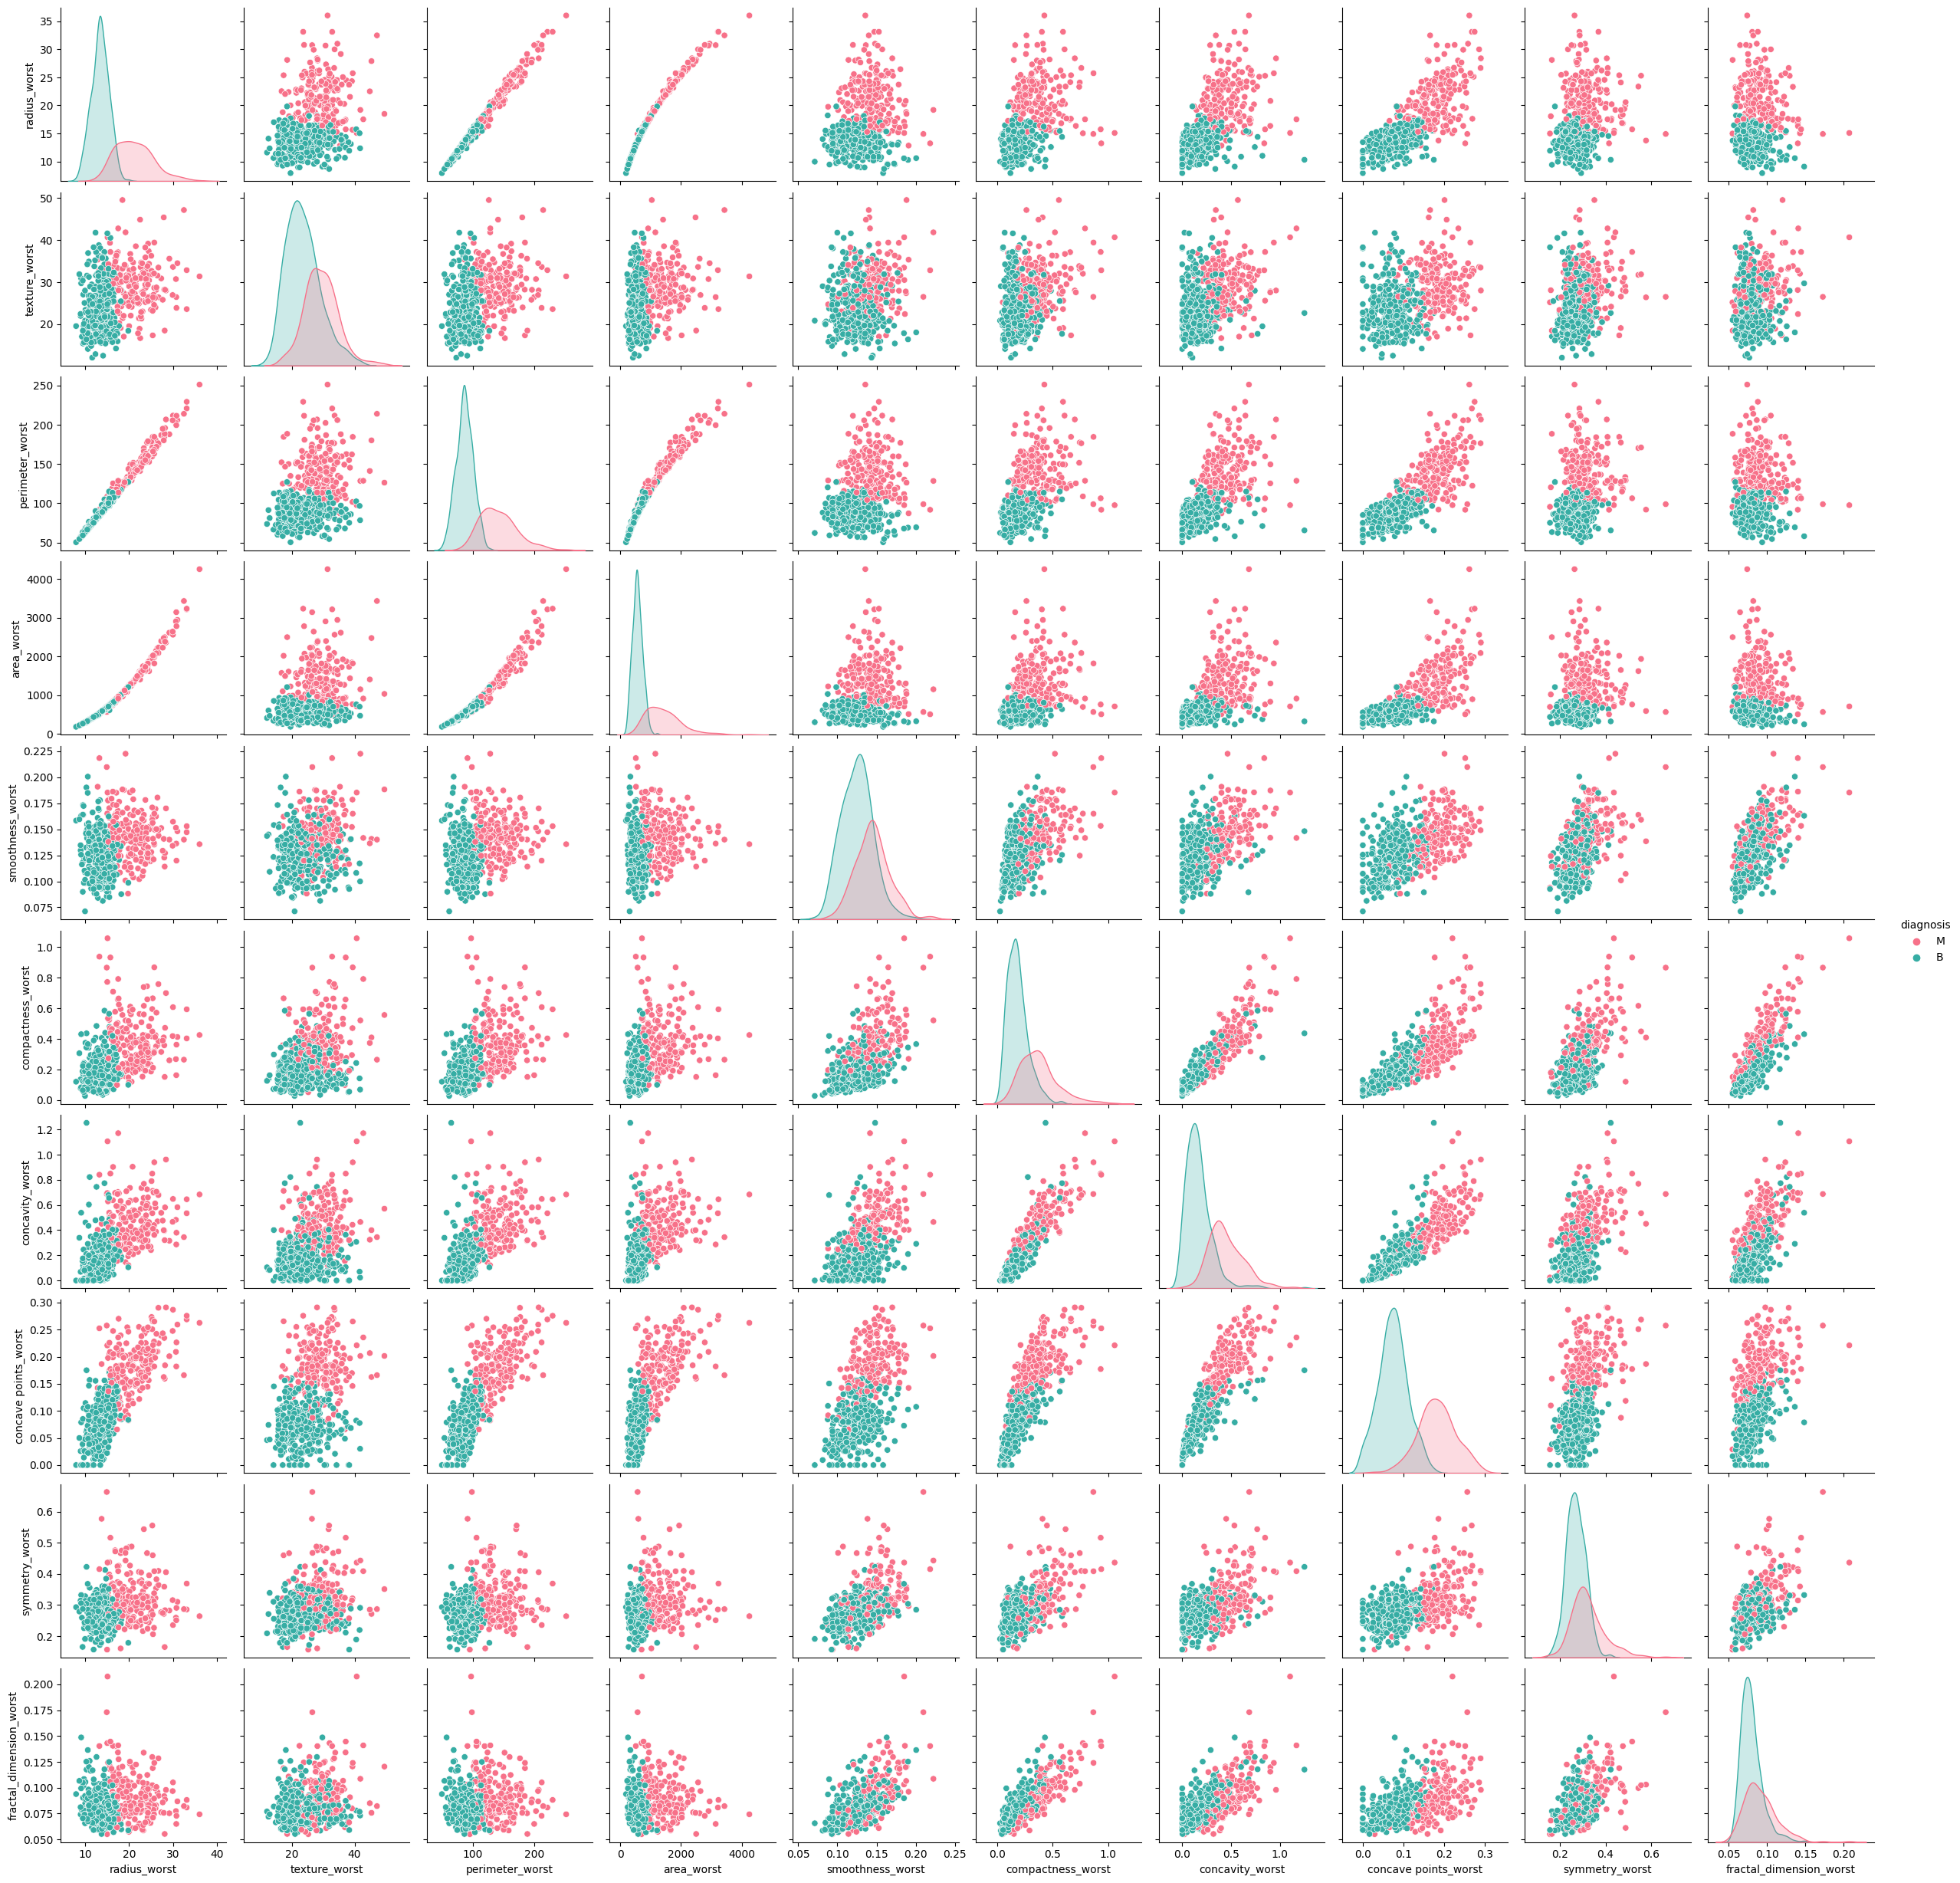

In [18]:
worst_features = [i for i in list(raw_df.columns) if '_worst' in i]
worst_features.append('diagnosis')
worst_df = raw_df[worst_features]
sns.pairplot(worst_df, hue = 'diagnosis',  palette='husl')
# sns.pairplot(df,hue = 'diagnosis', palette='Oranges')

---

### Correlation Analysis

In [19]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

- It could be seen that there are soo many features that are highly correlated to each other. We can drop one of these features that are highly correlated as they won't add any value to the classification model in the prediction.
- radius_mean, perimeter_mean and area_mean are highly correlated with each other so we can use one of them.
- Compactness_mean, concavity_mean and concave points_mean are correlated with each other.
- radius_se, perimeter_se and area_se are correlated 

# Data Preprocessing

In [20]:
# Changing the values of target class from categorical to numerical

df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})

#### We are setting the correlation threshold value to 0.90. Any columns with correlation more than 0.90 will be dropped from a certain set of features.

In [21]:
corr_matrix = df.corr().abs()

top_upper_corner = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
columns_to_drop = list()

for col in top_upper_corner.columns:
    if any(top_upper_corner[col] > 0.90):
        columns_to_drop.append(col)

print(f'Columns to be Dropped because of High Correlation are:->')

columns_to_drop

Columns to be Dropped because of High Correlation are:->


['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [22]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [23]:
df.shape

(569, 21)

#### As we can see, we are left with 20 independent variables and one target variable.

In [24]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
df.head(3)

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   

   concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0          0.3001         0.2419                 0.07871     1.0950   
1          0.0869         0.1812                 0.05667     0.5435   
2          0.1974         0.2069                 0.05999     0.7456   

   texture_se  ...  compactness_se  concavity_se  concave points_se  \
0      0.9053  ...         0.04904       0.05373            0.01587   
1      0.7339  ...         0.01308       0.01860            0.01340   
2      0.7869  ...         0.04006       0.03832            0.02058   

   symmetry_se  fractal_dimension_se  smoothness_worst  compactness_worst  \
0      0.03003              0.006193            0.1622             0.6656   
1      0.01389              0.003532            0.1238             0.1866   
2      0.02250              0.004571            0.1444             0.4245   

   concavity_worst  symmetry_worst  fractal_dimension_worst  
0           0.7119          0.4601                  0.11890  
1           0.2416          0.2750                  0.08902  
2           0.4504          0.3613                  0.08758  

[3 rows x 21 columns]

#### We can observe that the magnitude of these features are not in one scale. For example the value range of some features different is as compared to the others. In order to get good and unbiassed results from the trained classifier, we have to scale the values of all the features to make them available for the model.

### Splitting the Data

In [26]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

### Scaling the Test and Training set separately.

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape, y_test.shape)

(426, 20) (426,)
(143, 20) (143,)


# Model Building

In [30]:
def train_classifier_and_get_result(X_train, X_test, y_train, y_test):
    
    """
    This functions trains the classifier model on the training dataset and calculates the model accuracy for each classifier. 
    The function returns a pandas dataframe showing the classification algorithm and their performance on the validation
    dataset.
    
    """
    
    
    final_accuracy_list = list()
    
    models = [('DecisionTree', DecisionTreeClassifier(random_state=42)),
              ('AdaBoost', AdaBoostClassifier(random_state=42)),
              ('RandomForest', RandomForestClassifier(random_state=42)),
              ('GaussianNB', GaussianNB()),
              ('XGB', XGBClassifier(random_state=42)),
              ('CatBoost', CatBoostClassifier(verbose=False))]

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_pred, y_test)
        precision = precision_score(y_pred, y_test)
        recall = recall_score(y_pred, y_test)
        f1score = f1_score(y_pred, y_test)
        auc_score = roc_auc_score(y_test, model.predict(X_test))
        target_names = ['Malignant', 'Beningn']
        classification_rep = classification_report(y_test, y_pred, target_names=target_names)
        
        conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
        
        final_accuracy_list.append((name, accuracy, precision, recall, f1score, auc_score, classification_rep, conf_matrix))
        
        print(f"Classifier==>{name}\naccuracy==>{accuracy}")
        
        print('**'*50)
    
    columns=['classifier', 'accuracy', 'precision', 'recall', 'f1score', 'auc_score', 'classification_rep', 'conf_matrix']
    
    return pd.DataFrame(final_accuracy_list, columns=columns)

In [31]:
accuracy_df = train_classifier_and_get_result(X_train_scaled, X_test_scaled, y_train, y_test)

Classifier==>DecisionTree
accuracy==>0.916083916083916
****************************************************************************************************
Classifier==>AdaBoost
accuracy==>0.9440559440559441
****************************************************************************************************
Classifier==>RandomForest
accuracy==>0.958041958041958
****************************************************************************************************
Classifier==>GaussianNB
accuracy==>0.8951048951048951
****************************************************************************************************
Classifier==>XGB
accuracy==>0.965034965034965
****************************************************************************************************
Classifier==>CatBoost
accuracy==>0.965034965034965
****************************************************************************************************


## Training the ANN (neural network )

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

### Training Neural Network Model

In [33]:
neural_model = Sequential()
neural_model.add(Dense(units = 7, activation = 'relu'))
neural_model.add(Dense(units = 7, activation = 'relu'))
neural_model.add(Dense(units = 7, activation = 'relu'))
neural_model.add(Dense(units = 1, activation = 'sigmoid'))
neural_model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])
history = neural_model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled, y_test), batch_size = 16, epochs=50, verbose=0)

Metal device set to: Apple M1 Pro


2022-10-23 19:59:41.232821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-23 19:59:41.233283: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-23 19:59:41.313225: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-23 19:59:41.605973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-23 19:59:42.054008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Train:0.988262951374054 || Test:0.9790209531784058


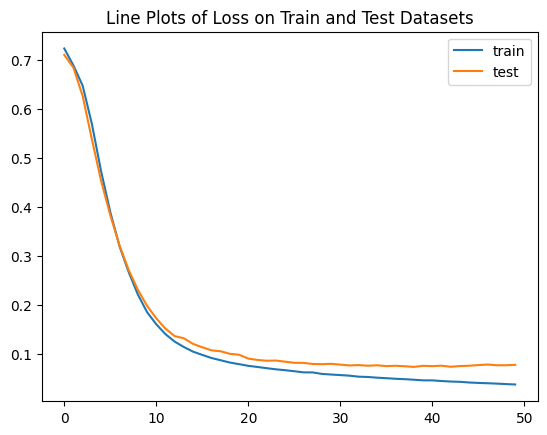

In [34]:
_, train_acc = neural_model.evaluate(X_train_scaled, y_train, verbose=0)
_, test_acc = neural_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Train:{train_acc} || Test:{test_acc}')
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Line Plots of Loss on Train and Test Datasets')
plt.legend()
plt.show()

In [35]:
y_pred = neural_model.predict(X_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

5/5 [==============================] - 0s 4ms/step


2022-10-23 19:59:55.954377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [36]:
# For ANN
cm = confusion_matrix(y_test,y_pred)
ann_accuracy = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test, y_pred)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1score = f1_score(y_pred, y_test)
target_names = ['Malignant', 'Beningn']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

ann_tup = [('ANN', ann_accuracy, precision, recall, f1score, auc_score, classification_rep, cm)]

In [37]:
# Adding the results of ANN to the results dataframe.

accuracy_df = accuracy_df.append(pd.DataFrame(ann_tup, columns=list(accuracy_df.columns)))

In [38]:
accuracy_df_sorted = accuracy_df.sort_values(by=['accuracy'], ascending=False)
accuracy_df_sorted

classifier  accuracy  precision    recall   f1score  auc_score  \
4           XGB  0.965035   0.946429  0.963636  0.954955   0.961720   
5      CatBoost  0.965035   0.928571  0.981132  0.954128   0.958539   
2  RandomForest  0.958042   0.910714  0.980769  0.944444   0.949610   
0           ANN  0.958042   0.892857  1.000000  0.943396   0.946429   
1      AdaBoost  0.944056   0.910714  0.944444  0.927273   0.938116   
0  DecisionTree  0.916084   0.928571  0.866667  0.896552   0.918309   
3    GaussianNB  0.895105   0.857143  0.872727  0.864865   0.888342   

                                  classification_rep         conf_matrix  
4                precision    recall  f1-score   ...  [[85, 2], [3, 53]]  
5                precision    recall  f1-score   ...  [[86, 1], [4, 52]]  
2                precision    recall  f1-score   ...  [[86, 1], [5, 51]]  
0                precision    recall  f1-score   ...  [[87, 0], [6, 50]]  
1                precision    recall  f1-score   ...  [[84, 3], [5, 51]]  
0                precision    recall  f1-score   ...  [[79, 8], [4, 52]]  
3                precision    recall  f1-score   ...  [[80, 7], [8, 48]]

# Results Analysis

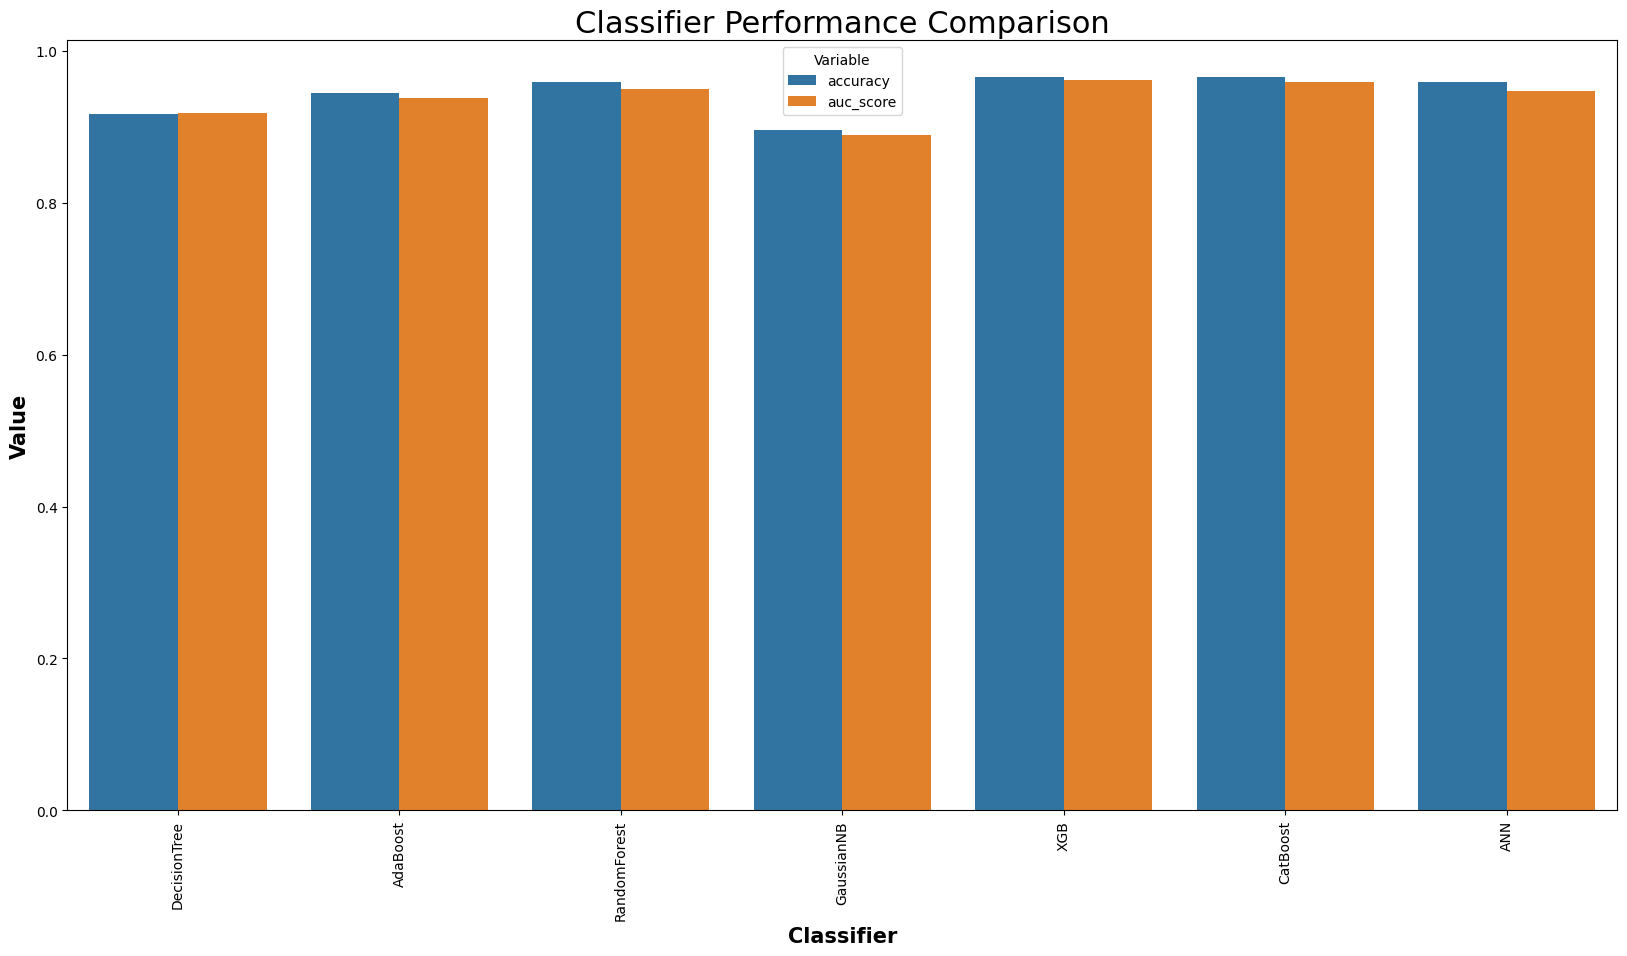

In [39]:
fig, ax1 = plt.subplots(figsize=(20, 10))
melted_df = accuracy_df[['classifier', 'accuracy', 'auc_score']].melt(id_vars='classifier').rename(columns=str.title)
plt.title('Classifier Performance Comparison', fontdict={'fontsize':22,
        'fontweight':50})
plt.xticks(rotation=90)
ax1.set_xlabel(ax1.get_xlabel(), fontdict={'weight': 'bold', 'size':15})
ax1.set_ylabel(ax1.get_ylabel(), fontdict={'weight': 'bold', 'size':15})
final_plot = sns.barplot(x='Classifier', y='Value', hue='Variable', data=melted_df, ax=ax1)

- We have trained 7 machine learning models to predict the cancer diagnosis.
- XGBoost has the maximum accuracy compared to other trained classifiers whereas GaussianNB has the least accuracy and auc score in predicting the cancer class.
- There is very minor difference in the accuracy of XGB and CatBoost.
- XGBoost has achieved an accuracy of 96.5% with an auc score of 0.96 making it the best model whereas Gaussian NB has achieved an accuracy of only 89.51% and auc score of 0.85 making it the worst model.

#### Showing the classification report for the best model (XGBoost). This gives us a detailed report of other metrics as well such as precision, recall and f1-score for each class.

In [40]:
classification_rep = accuracy_df_sorted.head(1).classification_rep.values[0]
print(classification_rep)

              precision    recall  f1-score   support

   Malignant       0.97      0.98      0.97        87
     Beningn       0.96      0.95      0.95        56

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



- As our dataset was balanced, we have taken accuracy as our evaluation metric to check the performance of the trained classifiers. We have got the best results for XGBoost model with 97% accuracy and 0.97 f1-score for Malignant class and f1-score of 0.95 for Beinign. 

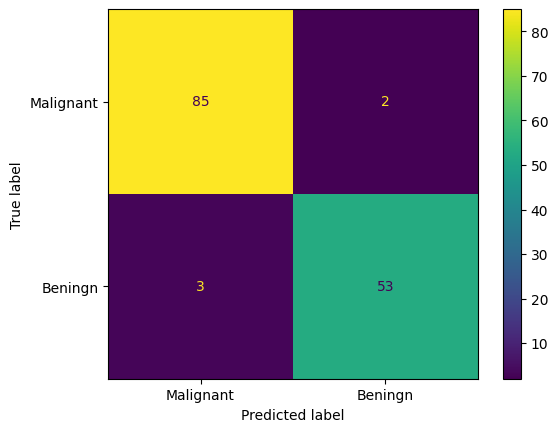

In [41]:
con = accuracy_df_sorted.head(1).conf_matrix.values[0]
disp = ConfusionMatrixDisplay(confusion_matrix=con,display_labels=['Malignant', 'Beningn'])
disp.plot()
plt.show()

#### Confusion Matrix a specific table layout that allows visualization of the performance of an algorithm.
- We can interpret from the above confusion matrix that the model has correctly predicted 85 samples of Malignant class whereas it wrongly predicted only 2 samples of this category.
- On the other hand, the model correctly predicted the 53 samples of Beningn and 3 sample as wrong in the prediction.

### Most Important Features.

Text(0.5, 1.0, 'XGBoost Feature Importance')

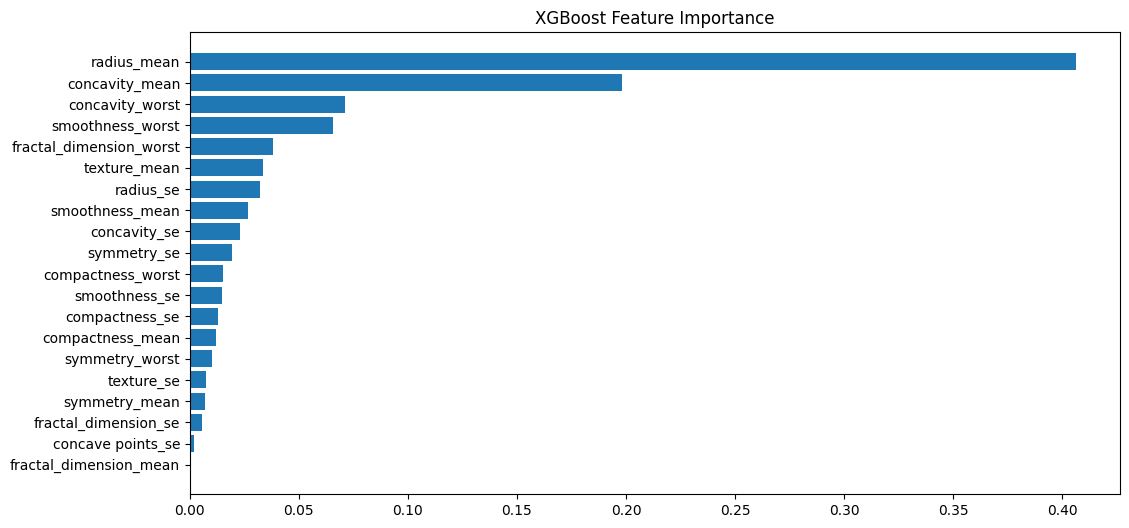

In [59]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)

imp_featues = xg_model.feature_importances_
sorted_idx = np.argsort(imp_featues)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), imp_featues[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('XGBoost Feature Importance')

#### The above plot shows the importance of features in making the predictions. Features such as radius)mean, concavity_mean, concavity_worst, smoothness_worst, fractal_dimension_worst, texture_mean, radius_se, smoothness_mean, concavity_se are some of the most important features in the predicion of breast cancer category in XGBoost  model.

----

# <center>End of Notebook</center>

----